In [0]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# import models
from keras.models import Sequential

from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Dropout
from keras.layers.advanced_activations import LeakyReLU 
from keras.layers import Activation
from keras import optimizers
from keras.constraints import maxnorm
from keras_preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D

Using TensorFlow backend.


In [3]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# load data from google drive
base_dir = "/content/drive/My Drive/Colab Notebooks/imgdata_224"

train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')
print(test_dir)

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/imgdata_224/test


In [6]:
# import VGG16 model
model = Sequential()

model.add(Conv2D(48,kernel_size=3, activation ='relu', padding='same', input_shape=(224,224,3)))
model.add(Conv2D(48,kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides = None))

model.add(Conv2D(64,kernel_size=3, activation ='relu', padding='same'))
model.add(Conv2D(64,kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides = None))

model.add(Conv2D(128,kernel_size=3, activation ='relu', padding='same'))
model.add(Conv2D(128,kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides = None))

model.add(Conv2D(256,kernel_size=3, activation ='relu', padding='same'))
model.add(Conv2D(256,kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides = None))

model.add(Conv2D(512,kernel_size=3, activation ='relu', padding='same'))
model.add(Conv2D(512,kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides = None))

model.add(Flatten())
model.add(Dense(1024,activation='linear'))
model.add(LeakyReLU(alpha=.001))   # add an advanced activation
model.add(Dropout(0.5))
#model.add(Dense(1024,activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 224, 224, 48)      1344      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 224, 224, 48)      20784     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 112, 112, 48)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 112, 112, 64)      27712     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 56, 56, 128)       73856     
__________

In [0]:
sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['acc'])
# model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-3),metrics=['acc'])

In [0]:
# Using ImageDataGenerator to read images from directories
# all images will be rescaled by 1./255 
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest') 
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical')

Found 1600 images belonging to 2 classes.


In [10]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224,224),
    batch_size=8,
    class_mode ='categorical')

Found 384 images belonging to 2 classes.


In [11]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=1,
    class_mode='categorical')


Found 200 images belonging to 2 classes.


In [0]:
from keras import callbacks as ca
es = ca.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [13]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=250,
    validation_data=validation_generator,
    validation_steps=48,
    callbacks=[es])


Instructions for updating:
Use tf.cast instead.
Epoch 1/250
50/50 [==============================] - 37s 744ms/step - loss: 0.6932 - acc: 0.5088 - val_loss: 0.6930 - val_acc: 0.5469
Epoch 2/250
50/50 [==============================] - 33s 659ms/step - loss: 0.6930 - acc: 0.5125 - val_loss: 0.6928 - val_acc: 0.5365
Epoch 3/250
50/50 [==============================] - 33s 669ms/step - loss: 0.6931 - acc: 0.4888 - val_loss: 0.6927 - val_acc: 0.5885
Epoch 4/250
50/50 [==============================] - 33s 659ms/step - loss: 0.6926 - acc: 0.5269 - val_loss: 0.6925 - val_acc: 0.5990
Epoch 5/250
50/50 [==============================] - 33s 657ms/step - loss: 0.6927 - acc: 0.5331 - val_loss: 0.6924 - val_acc: 0.5964
Epoch 6/250
50/50 [==============================] - 32s 648ms/step - loss: 0.6923 - acc: 0.5425 - val_loss: 0.6922 - val_acc: 0.5990
Epoch 7/250
50/50 [==============================] - 31s 629ms/step - loss: 0.6919 - acc: 0.5537 - val_loss: 0.6920 - val_acc: 0.5911
Epoch 8/250
50

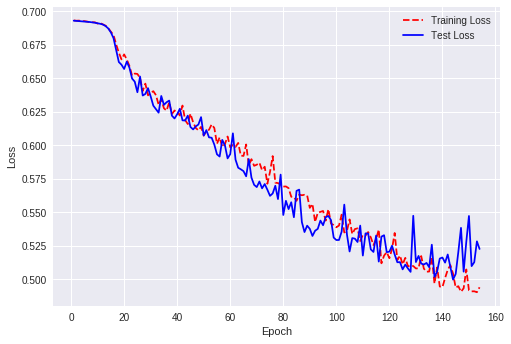

In [14]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


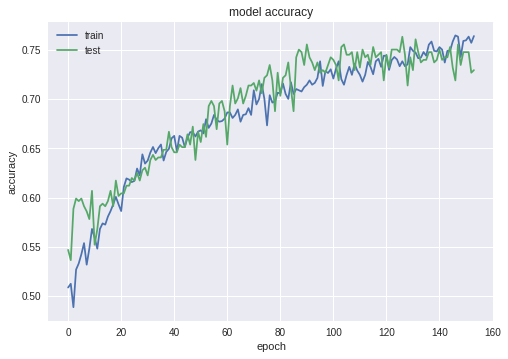

In [15]:
# Plot Training History. 
# list all data in history 
print(history.history.keys()) 

# summarize history for accuracy 
plt.plot(history.history['acc']) 
plt.plot(history.history['val_acc']) 
plt.title('model accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

In [0]:
print(model.trainable_weights)

[<tf.Variable 'conv2d_1/kernel:0' shape=(3, 3, 3, 48) dtype=float32_ref>, <tf.Variable 'conv2d_1/bias:0' shape=(48,) dtype=float32_ref>, <tf.Variable 'conv2d_2/kernel:0' shape=(3, 3, 48, 48) dtype=float32_ref>, <tf.Variable 'conv2d_2/bias:0' shape=(48,) dtype=float32_ref>, <tf.Variable 'conv2d_3/kernel:0' shape=(3, 3, 48, 64) dtype=float32_ref>, <tf.Variable 'conv2d_3/bias:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'conv2d_4/kernel:0' shape=(3, 3, 64, 64) dtype=float32_ref>, <tf.Variable 'conv2d_4/bias:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'conv2d_5/kernel:0' shape=(3, 3, 64, 128) dtype=float32_ref>, <tf.Variable 'conv2d_5/bias:0' shape=(128,) dtype=float32_ref>, <tf.Variable 'conv2d_6/kernel:0' shape=(3, 3, 128, 128) dtype=float32_ref>, <tf.Variable 'conv2d_6/bias:0' shape=(128,) dtype=float32_ref>, <tf.Variable 'conv2d_7/kernel:0' shape=(3, 3, 128, 256) dtype=float32_ref>, <tf.Variable 'conv2d_7/bias:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'conv2d_8/kernel:0' 

In [16]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

#Confution Matrix and Classification Report for Validation set
Y_pred = model.predict_generator(validation_generator, 384//8,verbose=1)
print(len(Y_pred))
y_pred = np.argmax(Y_pred, axis=1)

print('\n\nConfusion Matrix (Validation Image set)')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Cardiomegaly', 'No Finding']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# validation_generator [200//2]
# test_generator

48/48 [==============================] - 3s 54ms/step
384


Confusion Matrix (Validation Image set)
[[113  79]
 [119  73]]
Classification Report
              precision    recall  f1-score   support

Cardiomegaly       0.49      0.59      0.53       192
  No Finding       0.48      0.38      0.42       192

   micro avg       0.48      0.48      0.48       384
   macro avg       0.48      0.48      0.48       384
weighted avg       0.48      0.48      0.48       384



In [17]:
# Confution Matrix and Classification Report for Test Image set
Y_pred = model.predict_generator(test_generator, 200//1,verbose=1)
print(len(Y_pred))
y_pred = np.argmax(Y_pred, axis=1)

print('\n\nConfusion Matrix (Test Image set)')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ['Cardiomegaly', 'No Finding']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))


200/200 [==============================] - 2s 12ms/step
200


Confusion Matrix (Test Image set)
[[59 41]
 [70 30]]
Classification Report
              precision    recall  f1-score   support

Cardiomegaly       0.46      0.59      0.52       100
  No Finding       0.42      0.30      0.35       100

   micro avg       0.45      0.45      0.45       200
   macro avg       0.44      0.44      0.43       200
weighted avg       0.44      0.45      0.43       200



In [18]:
# serialize weights to HDF5
model.save_weights("assign_1b_5_saved_model.h5")
print("Saved model to disk")

Saved model to disk
